#  Création d'un neurone et d'un réseau de neurone

Dans le cadre de mon bachelor dataIA, j'ai l'occasion de pouvoir générer un neurone artificiel ainsi qu'un réseau de neurones artificiels en python afin d'expérimenter le deep learning de manière simple

# Setup

In [1]:
pip install --no-cache-dir -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import accuracy_score


plt.style.use('dark_background')
plt.rcParams.update({
    "figure.facecolor":  (0.12 , 0.12, 0.12, 1),
    "axes.facecolor": (0.12 , 0.12, 0.12, 1),
})

# Création du premier Neurone

## 1.1 Diagramme de classe

#### Diagramme des classes à réaliser pour notre Neurone.

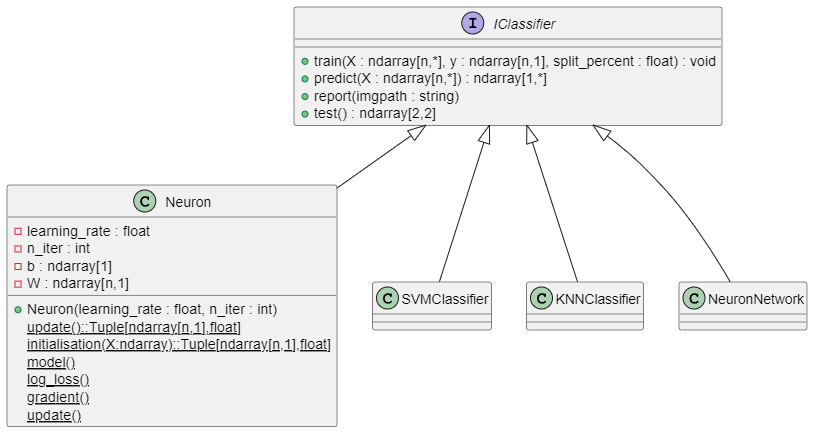



Lors d'un projet précédent, nous avons utilisé les classifier SVM et KNN. Dans ce projet la classe  IClassifier permettait de formaliser tous les classifier qui en hérite dans une démarche SOLID, comme SVM, KNN et donc ici la classe Neuron que nous voulons créer.

## 1.2 Création du jeu de données 

Pour étudier la performance de notre neurone, il nous faut un dataset pour l'entrainer et le tester.
Or notre neurone, avec ses paramètres d'apprentissage b et W, est un modèle linéaire. Ce premier dataset est donc linéairement séparable. 

dimensions de X: (1000, 2)
dimensions de y: (1000, 1)


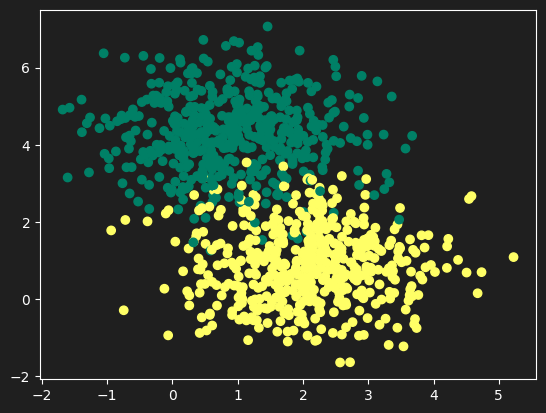

In [3]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0], 1))

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

## 1.3 Création du neurone 

100%|██████████| 10000/10000 [00:00<00:00, 11852.30it/s]


Confusion matrix: 
[[100   4]
 [  7  89]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95       104
           1       0.96      0.93      0.94        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200



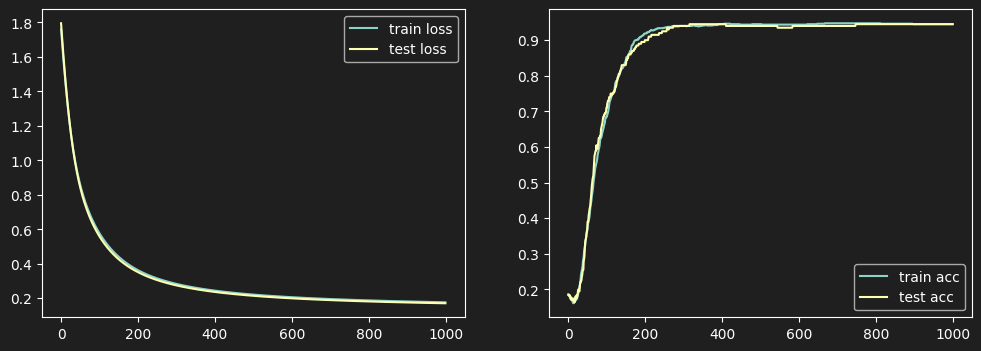

In [4]:
from neurone import *

neuron = Neuron(learning_rate = 0.001, n_iter = 10000, n_features= X.shape[1])

neuron.train(X, y, split_percent = 0.2)
neuron.test()
neuron.report()

Après l'entrainement et le test de notre neuron, nous voyons que celui-ci a des scores d'environ 95% sur ce dataset simple.
Cependant nous ne voulons pas en rester là et notre neurone doit être plus performant et approcher le plus possible les 100%.

# 1.4 Test sur un jeu de données non linéaire

dimensions de X: (1000, 2)
dimensions de y: (1000,)


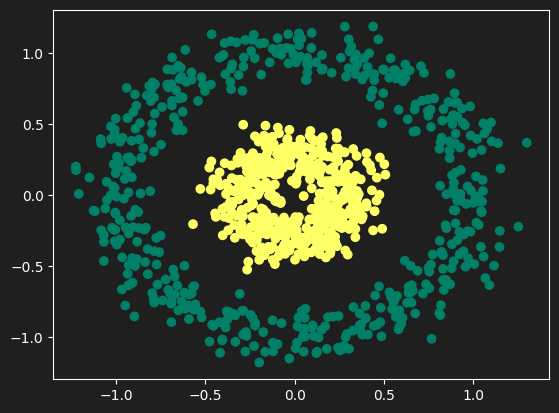

In [11]:
X, y = make_circles(n_samples=1000, noise = 0.1, factor=0.3, random_state=0)

print('dimensions de X:', X.shape)
print('dimensions de y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()

On teste ici notre neurone sur un dataset non linéaire

100%|██████████| 100/100 [00:00<00:00, 7971.84it/s]

Confusion matrix: 
[[40 58]
 [33 69]]
              precision    recall  f1-score   support

           0       0.55      0.41      0.47        98
           1       0.54      0.68      0.60       102

    accuracy                           0.55       200
   macro avg       0.55      0.54      0.54       200
weighted avg       0.55      0.55      0.54       200



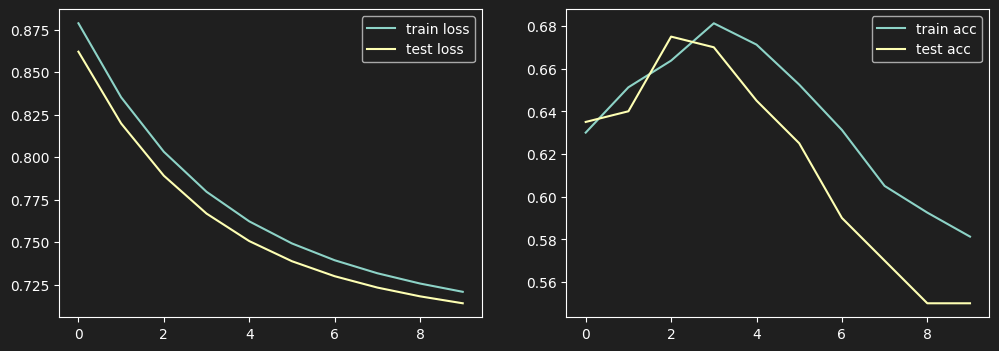

In [12]:
neuron_cricle = Neuron(learning_rate = 0.1, n_iter = 100, n_features= X.shape[1])

neuron_cricle.train(X, y, split_percent = 0.2)
neuron_cricle.test()
neuron_cricle.report()

On voit donc ici que le neurone n'est pas adapté car les données ne sont pas linéairement séparables

# 2 Création du réseau de neurones

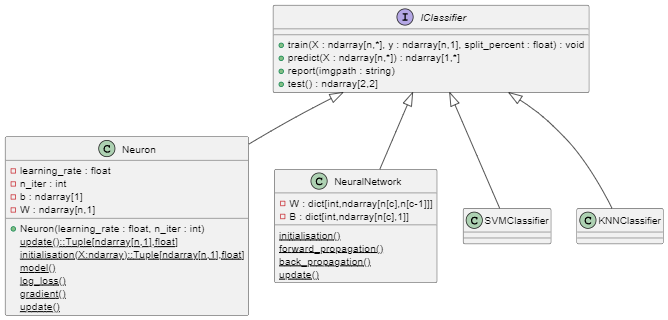

Comme le neurone simple, le réseau de neurone hérite lui aussi de notre IClassifier

100%|██████████| 2000/2000 [00:04<00:00, 432.30it/s]


Confusion matrix: 
[[ 88   3]
 [  9 100]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        91
           1       0.97      0.92      0.94       109

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



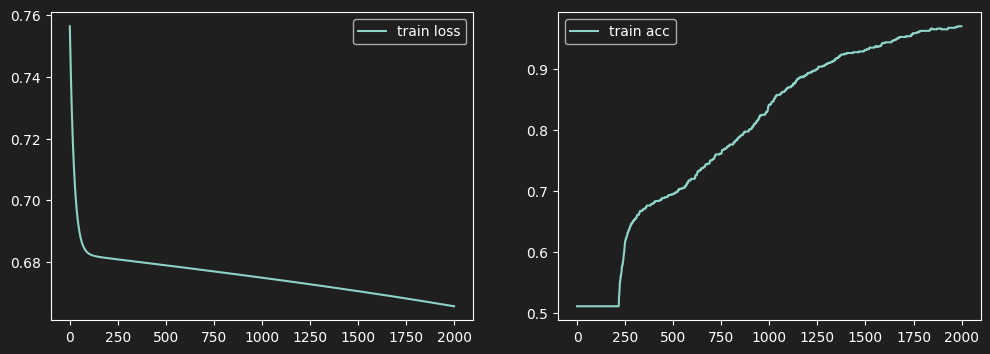

In [14]:
neural_network = NeuralNetwork(learning_rate = 0.01, n_iter = 2000, dimensions = [X.shape[1],16,16,16,1])

neural_network.train(X, y, split_percent = 0.2)
neural_network.test()
neural_network.report()

On voit donc que le réseau de neurone permet d'obtenir de biens meilleurs résultats sur un jeu de données non linéairement séparable